In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

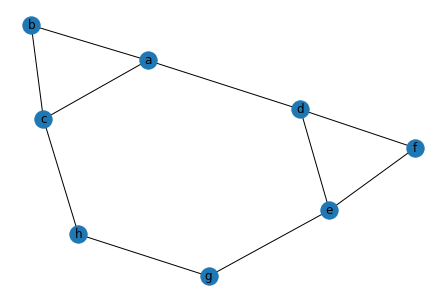

In [37]:
H = nx.Graph()
H.add_nodes_from(['a','b', 'c', 'd', 'e', 'f', 'g', 'h'])
edg = [
    ('a','b'), ('b','c'), ('c','a'), ('a','d'), ('d','e'), ('e', 'f'), ('f','d'), ('e','g'), ('g','h'), ('h','c')
]

for e in edg:
    H.add_edge(*e)


nx.draw(H, with_labels=1)

In [38]:
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.make_max_clique_graph.html#networkx.algorithms.clique.make_max_clique_graph

# The nodes of the maximal clique graph of G are the cliques of G 
# and an edge joins two cliques if the cliques are not disjoint.

clique_cover = nx.make_max_clique_graph(H, create_using=None)
list(clique_cover.nodes)



[0, 1, 2, 3, 4, 5]

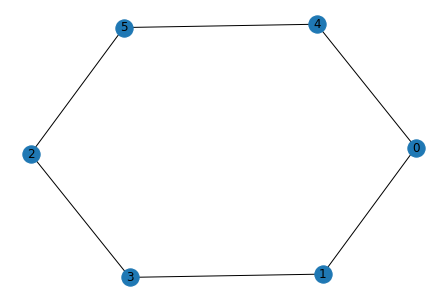

In [47]:
nx.draw(clique_cover, with_labels=1)

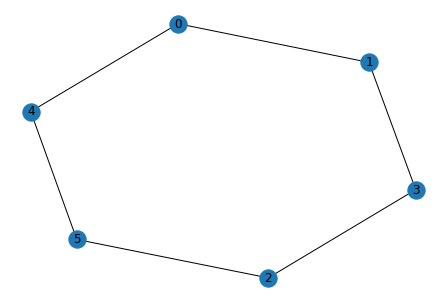

In [41]:
T = nx.make_max_clique_graph(H)
nx.draw(T, with_labels=1)

In [30]:
list(nx.find_cliques(H))

[['h', 'c'],
 ['h', 'g'],
 ['e', 'f', 'd'],
 ['e', 'g'],
 ['b', 'c', 'a'],
 ['a', 'd']]

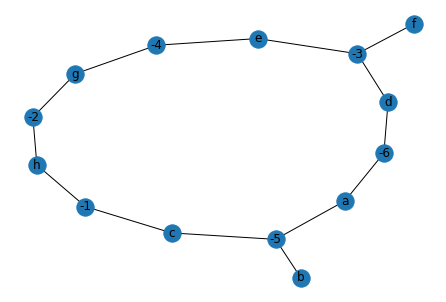

In [36]:
GG = nx.make_clique_bipartite(H)
nx.draw(GG, with_labels=1)

In [60]:
def project_down(B,create_using=None,name=None): 
    """  
    Project a bipartite graph B down onto its "Bottom Nodes". 
    The nodes retain their names and are connected if they 
    share a common Top Node in the Bipartite Graph. 
    Returns a Graph. 
    """ 
    if create_using: 
        G=create_using 
        G.clear() 
    else: 
        G=nx.Graph() 
    if name is not None: 
        G.name=name 
    
    for v in B.nodes(): 
        if B.node_type[v]=="Bottom": 
            G.add_node(v) 
            for cv in B.neighbors(v): 
                G.add_edges_from([(v,u) for u in B.neighbors(cv)]) 
    return G 

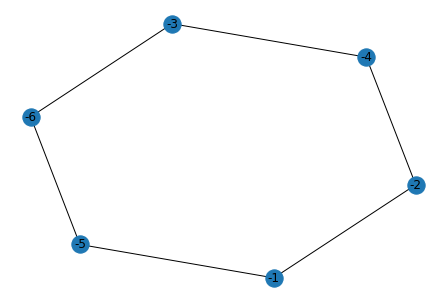

In [67]:
G = nx.make_clique_bipartite(H)
cliques = [v for v in G.nodes() if G.nodes[v]['bipartite'] == 0]
G = nx.bipartite.project(G, cliques)
G = nx.relabel_nodes(G, {-v: v - 1 for v in G})
nx.draw(G, with_labels=1)

In [50]:
nx.cliques_containing_node(clique_cover)

{0: [[0, 1], [0, 4]],
 1: [[0, 1], [3, 1]],
 2: [[2, 3], [2, 5]],
 3: [[2, 3], [3, 1]],
 4: [[0, 4], [5, 4]],
 5: [[2, 5], [5, 4]]}

In [53]:
nx.cliques_containing_node(H)

{'a': [['b', 'c', 'a'], ['a', 'd']],
 'b': [['b', 'c', 'a']],
 'c': [['h', 'c'], ['b', 'c', 'a']],
 'd': [['e', 'f', 'd'], ['a', 'd']],
 'e': [['e', 'f', 'd'], ['e', 'g']],
 'f': [['e', 'f', 'd']],
 'g': [['h', 'g'], ['e', 'g']],
 'h': [['h', 'c'], ['h', 'g']]}